# Distribuição de frequência

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [2]:
data = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152,
                 173, 160, 155, 164, 168, 162, 161, 168, 163, 156,
                 155, 169, 151, 170, 164, 155, 152, 163, 160, 155,
                 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

## Ordenação

In [3]:
data = np.sort(data)

In [4]:
data

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [5]:
minimum = data.min()
minimum

150

In [6]:
maximum = data.max()
maximum

173

In [7]:
np.unique(data, return_counts=True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1],
       dtype=int64))

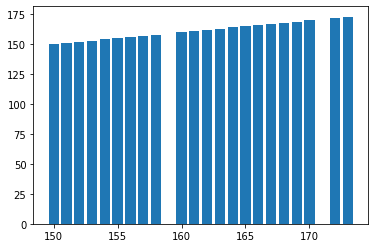

In [8]:
plt.bar(data, data);

## Número de classes
* i = 1 + 3.3 log n

In [9]:
n = len(data)
n

40

In [58]:
i = (1 + 3.3) * np.log10(n)
i

6.8888579627102375

In [61]:
i % 2 >= 0.5

True

In [59]:
i = round(i)
i

7.0

## Amplitude do intervalo
* h= AA / i
* AA = Xmax - Xmin

In [36]:
AA = maximum - minimum
AA

23

In [53]:
h = AA // i
h

3.0

In [55]:
(h + 1) * i // i

4.0

In [52]:
h = math.ceil(h)
h

4

## Construção da distribuição de frequência

In [15]:
def rest(AA, h):   
    last = (AA + h) // h 
    if AA % h != 0:
        last = AA // h
    return last

In [16]:
interval = np.arange(minimum, maximum+rest(AA, h), step = h)
interval

array([150, 154, 158, 162, 166, 170, 174])

In [84]:
fi = []
counter = 0
for i in range(len(interval) - 1):
    for val in np.sort(data):
        if val in list(range(interval[i], interval[i + 1])):
            counter +=1
    fi.append(counter)
    counter = 0

5
9
11
7
5
3


In [17]:
interv1, interv2, interv3, interv4, interv5, interv6 = 0,0,0,0,0,0
for i in range(n):
    if data[i] >= interval[0] and data[i] < interval[1]:
        interv1 += 1
    elif data[i] >= interval[1] and data[i] < interval[2]:
        interv2 += 1
    elif data[i] >= interval[2] and data[i] < interval[3]:
        interv3 += 1
    elif data[i] >= interval[3] and data[i] < interval[4]:
        interv4 += 1
    elif data[i] >= interval[4] and data[i] < interval[5]:
        interv5 += 1
    elif data[i] >= interval[5] and data[i] < interval[6]:
        interv6 += 1
        
lst_interval = [interv1, interv2, interv3, interv4, interv5, interv6]
lst_interval

[5, 9, 11, 7, 5, 3]

In [18]:
lst_class = [f'{str(interval[i])}-{str(interval[i + 1])}' for i in range(len(lst_interval))]
lst_class

['150-154', '154-158', '158-162', '162-166', '166-170', '170-174']

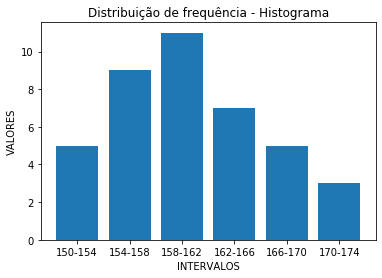

In [19]:
plt.bar(lst_class, lst_interval)
plt.title('Distribuição de frequência - Histograma')
plt.xlabel('INTERVALOS')
plt.ylabel('VALORES');

## Distribuição de frequência e histograma com numpy e matplotlib

- https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
- https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges

In [20]:
data = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152,
                 173, 160, 155, 164, 168, 162, 161, 168, 163, 156,
                 155, 169, 151, 170, 164, 155, 152, 163, 160, 155,
                 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

In [21]:
freq, classes = np.histogram(data)
freq, classes, len(classes)

(array([4, 2, 7, 3, 9, 3, 5, 3, 2, 2], dtype=int64),
 array([150. , 152.3, 154.6, 156.9, 159.2, 161.5, 163.8, 166.1, 168.4,
        170.7, 173. ]),
 11)

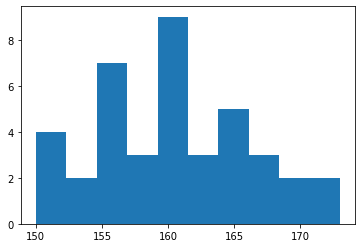

In [22]:
plt.hist(data, bins = classes);

In [23]:
freq, classes = np.histogram(data, bins = 5)
freq, classes, len(classes)

(array([ 6, 10, 12,  8,  4], dtype=int64),
 array([150. , 154.6, 159.2, 163.8, 168.4, 173. ]),
 6)

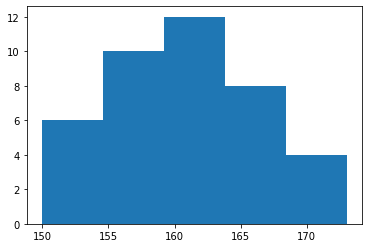

In [24]:
plt.hist(data, bins = classes);

In [25]:
freq, classes = np.histogram(data, bins = 'sturges')
freq, classes, len(classes)

(array([ 5,  8,  3, 12,  5,  4,  3], dtype=int64),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]),
 8)

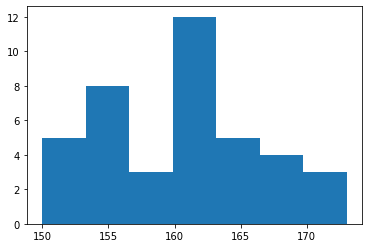

In [26]:
plt.hist(data, bins = classes);

## Distribuição de frequência e histograma com pandas e seaborn

In [27]:
type(data)

numpy.ndarray

In [28]:
df = pd.DataFrame({'data':data})
df.head()

,data
0,160
1,165
2,167
3,164
4,160


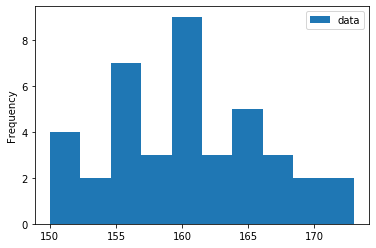

In [29]:
df.plot.hist();

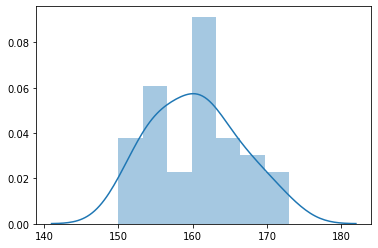

In [30]:
sns.distplot(data, hist = True, kde = True, bins = 7);